# Project Name – Cab Fare Prediction

### Problem Statement

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

### Data Set :
1) train_cab.zip

2) test.zip

(Data set is provided in the form of CSV file)

Train data set have 16067 observations

Test data set have 9914 observations

In [1]:
#Importing libraries
import os                                                #getting access to input files
import pandas as pd                                      #Importing pandas for performing EDA
import numpy as np                                       #Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt                          #Importing for Data Visualization
import seaborn as sns                                    #Importing for Data Visualization
from collections import Counter                          #sub-class available in dictonary class    
from sklearn.tree import DecisionTreeRegressor           #Algorithm model
from sklearn.ensemble import RandomForestRegressor       #Algorithm model
from sklearn.ensemble import GradientBoostingRegressor   #Algorithm model
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV        #ML algorithm
from sklearn.model_selection import train_test_split     #splitting dataset
from sklearn.metrics import mean_squared_error           #MSE calculation
from sklearn.metrics import r2_score                     # r2 score calculation
from pprint import pprint                                # more formated and readable way
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV        # model fit purpose 
import pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline                                       

In [2]:
#Loading the data
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("test.csv")

## Data Insights

In [3]:
train.head()     # shows first five rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
test.head()      # shows first five rows of the test dataset

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
#checking the number of rows and columns in both data sets
print("shape of training data is: ",train.shape)      
print("shape of test data is: ",test.shape)           

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


#### Observations
1. Train data set have 16067 observationbs and 7 variables 

2. test data set have 9914 observations and 9 variables

In [6]:
#checking the data-types in training dataset
train.dtypes 

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16066 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


#### Observation-
Here we can see fare amount and pickup datetime is of object type. So we need to change the data type of both.

In [8]:
#checking the data-types in test dataset
test.dtypes                        

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [10]:
# train data summary
train.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
# test data summary
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### Data Cleaning & Missing Value Analysis

In [12]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [13]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

Here our fair_amount is converted from object to float

In [14]:
train.shape

(16067, 7)

In [15]:
#dropping NA values in datetime column
train.dropna(subset= ["pickup_datetime"])   

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [16]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [17]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

Here our pickup_datetime is converted from object to datetime

In [18]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [19]:
#Re-checking format and datatypes after conversion
train.dtypes 

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [20]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2015-01-27 13:08:24,-73.844311,40.721319,-73.841610,40.712278,1.0,2015.0,1.0,27.0,1.0,13.0,8.0
1,16.9,2015-01-27 13:08:24,-74.016048,40.711303,-73.979268,40.782004,1.0,2015.0,1.0,27.0,1.0,13.0,8.0
2,5.7,2011-10-08 11:53:44,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,10.0,8.0,5.0,11.0,53.0
3,7.7,2012-12-01 21:12:12,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,12.0,1.0,5.0,21.0,12.0
4,5.3,2012-12-01 21:12:12,-73.968095,40.768008,-73.956655,40.783762,1.0,2012.0,12.0,1.0,5.0,21.0,12.0


#### Observations :

1. An outlier in pickup_datetime column occur of value 43
2. Passenger count should not be exceed 6(even if we consider SUV)
3. Latitudes range from -90 to 90. Longitudes range from -180 to 180
4. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

In [21]:
#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(9914, 13)
0


In [22]:
#Checking the passenger count variable : 
train["passenger_count"].describe()

count    9860.00000
mean        3.23911
std        77.52472
min         0.00000
25%         1.00000
50%         1.00000
75%         2.00000
max      5345.00000
Name: passenger_count, dtype: float64

We can see maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [23]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [24]:
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [25]:
train["passenger_count"].describe()

count    9803.000000
mean        1.651578
std         1.270776
min         0.120000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [26]:
train["passenger_count"].sort_values(ascending= True)

8862    0.12
6062    1.00
6060    1.00
6059    1.00
6058    1.00
        ... 
8007     NaN
8076     NaN
8139     NaN
8259     NaN
8306     NaN
Name: passenger_count, Length: 9857, dtype: float64

In [27]:
#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(9803, 13)
0


There is one passenger count value of 0.12 which is not possible. Hence we will remove fractional passenger value

In [28]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(9802, 13)

In [29]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 9802, dtype: float64

In [30]:
Counter(train["fare_amount"]<0)

Counter({False: 9800, True: 2})

In [31]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(9800, 13)

In [32]:
##Checking for negative values in the fare_amount variable column
train["fare_amount"].min()

0.01

In [33]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(9799, 13)

In [34]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(9797, 13)

In [35]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(9773, 13)
0


In [36]:
train["fare_amount"].describe()

count    9773.000000
mean       11.357308
std        11.463174
min         1.140000
25%         6.000000
50%         8.500000
75%        12.500000
max       453.000000
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [37]:
# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2012-07-24 04:44:26,-73.947235,401.083332,-73.951392,40.778927,1.0,2012.0,7.0,24.0,1.0,4.0,44.0


In [38]:
#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]
train.shape

(9772, 13)

In [39]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Calculating distance based on the given coordinates 


In [40]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
#Here for haversine formula help taken from formula.in
from math import radians, cos, sin, asin, sqrt
#we define function for haversine
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [41]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2015-01-27 13:08:24,-73.844311,40.721319,-73.841610,40.712278,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,1.030764
1,16.9,2015-01-27 13:08:24,-74.016048,40.711303,-73.979268,40.782004,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,8.450134
2,5.7,2011-10-08 11:53:44,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,10.0,8.0,5.0,11.0,53.0,1.389525
3,7.7,2012-12-01 21:12:12,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,2.799270
4,5.3,2012-12-01 21:12:12,-73.968095,40.768008,-73.956655,40.783762,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,1.999157


In [43]:
train.shape

(9772, 14)

In [44]:
train.nunique()

fare_amount           367
pickup_datetime      1750
pickup_longitude     8792
pickup_latitude      9010
dropoff_longitude    8828
dropoff_latitude     9008
passenger_count         7
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9500
dtype: int64

In [45]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

9147    8667.542104
8647    8667.497512
2397    8667.454421
472     8667.304968
4597    8666.566030
           ...     
5212       0.000000
8711       0.000000
5136       0.000000
5123       0.000000
5449       0.000000
Name: distance, Length: 9772, dtype: float64

There are some outliers are present so we need to remove such outliers


In [46]:
Counter(train['distance'] == 0)

Counter({False: 9499, True: 273})

In [47]:
Counter(train['fare_amount'] == 0)

Counter({False: 9772})

In [48]:
###we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(9499, 14)

In [49]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(9487, 14)

In [50]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2015-01-27 13:08:24,-73.844311,40.721319,-73.841610,40.712278,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,1.030764
1,16.9,2015-01-27 13:08:24,-74.016048,40.711303,-73.979268,40.782004,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,8.450134
2,5.7,2011-10-08 11:53:44,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,10.0,8.0,5.0,11.0,53.0,1.389525
3,7.7,2012-12-01 21:12:12,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,2.799270
4,5.3,2012-12-01 21:12:12,-73.968095,40.768008,-73.956655,40.783762,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,1.999157


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [51]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [52]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2015.0,1.0,27.0,1.0,13.0,1.030764
1,16.9,1.0,2015.0,1.0,27.0,1.0,13.0,8.450134
2,5.7,2.0,2011.0,10.0,8.0,5.0,11.0,1.389525
3,7.7,1.0,2012.0,12.0,1.0,5.0,21.0,2.799270
4,5.3,1.0,2012.0,12.0,1.0,5.0,21.0,1.999157


In [53]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [54]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

### Data Visualization 

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

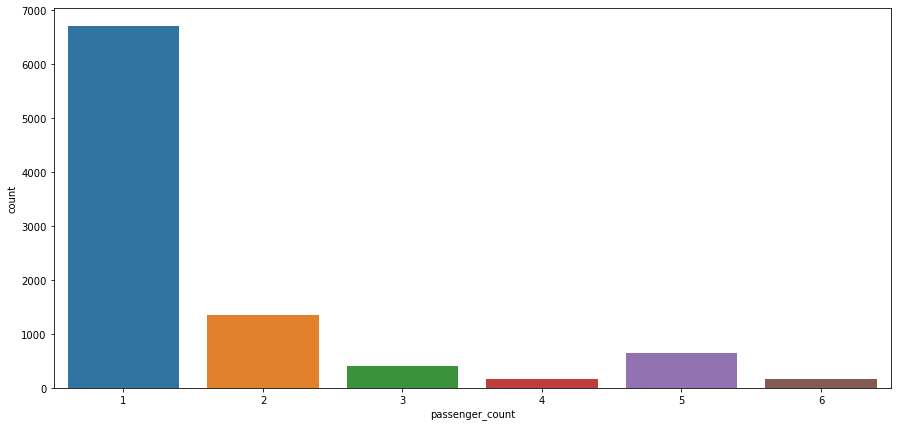

In [55]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

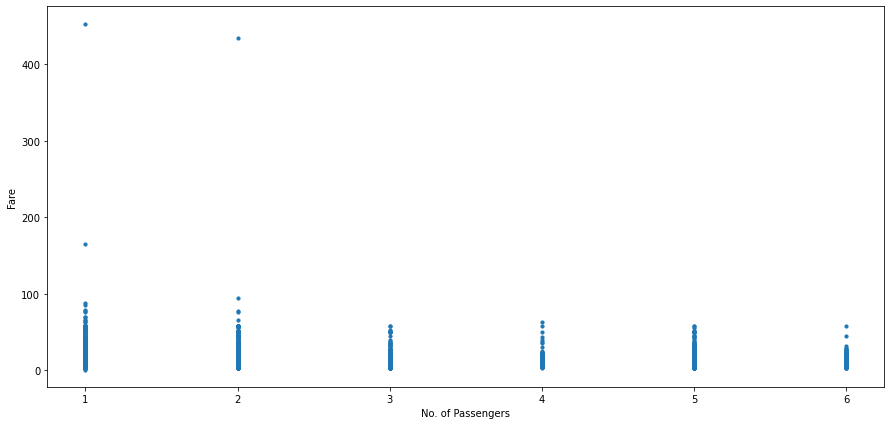

In [56]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### Observations :
   By seeing the above plots we can easily conclude that:
1. single travelling passengers are most frequent travellers.
2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

3. Number of Passengers effects the the fare

4. Pickup date and time effects the fare

5. Day of the week does effects the fare

6. Distance effects the fare

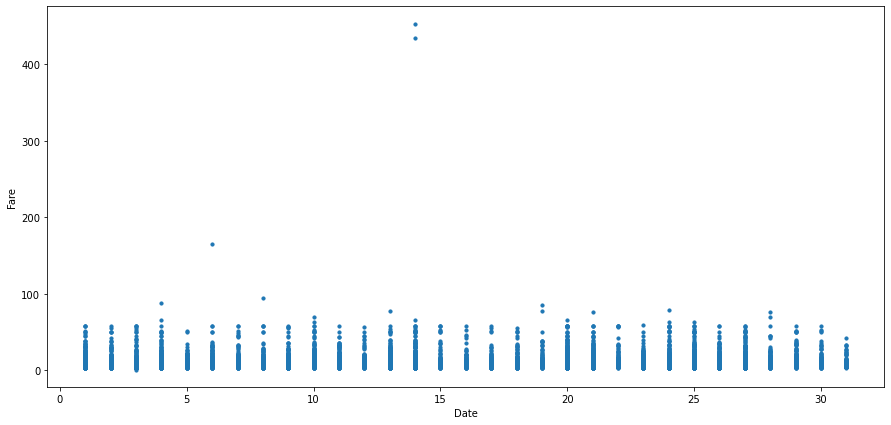

In [57]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

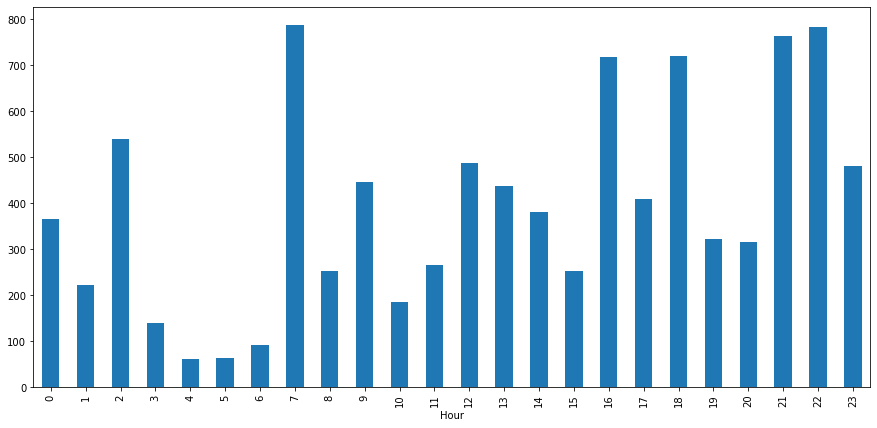

In [58]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Observation

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

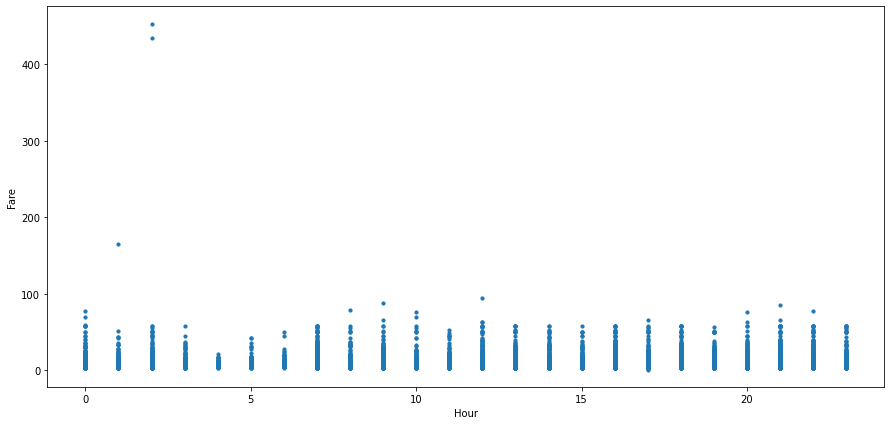

In [59]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


<AxesSubplot:xlabel='Day', ylabel='count'>

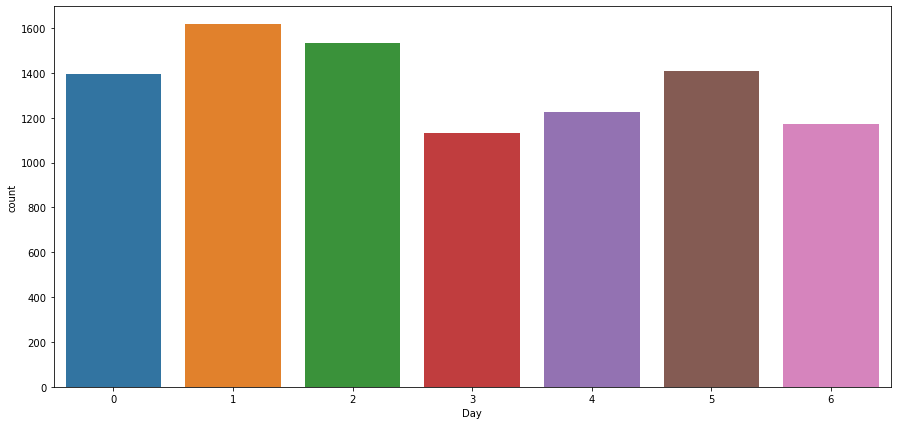

In [60]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

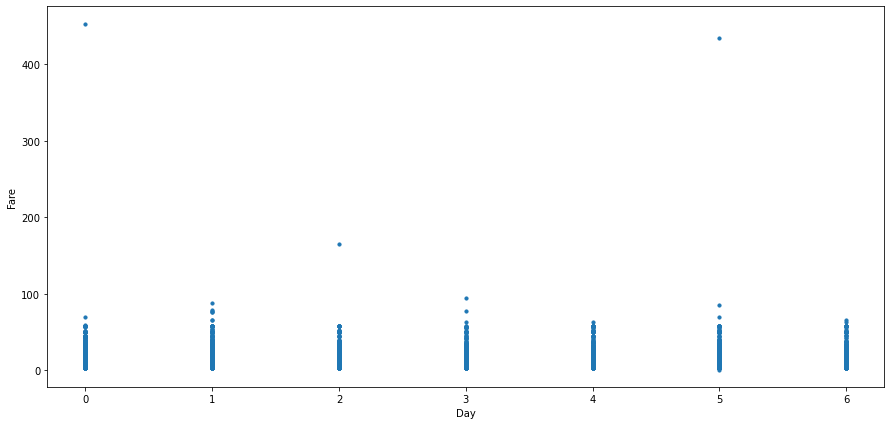

In [61]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

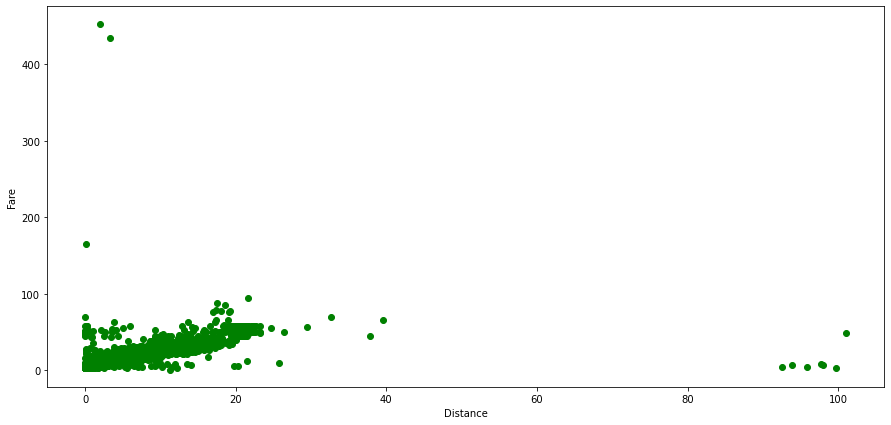

In [62]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

# Feature Scaling :

fare_amount


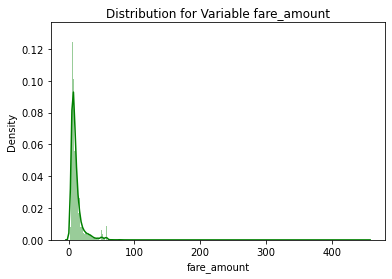

distance


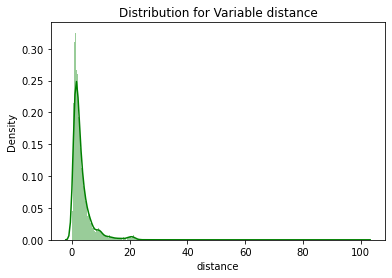

In [63]:
#Normality check of training data is uniformly distributed or not-
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [64]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


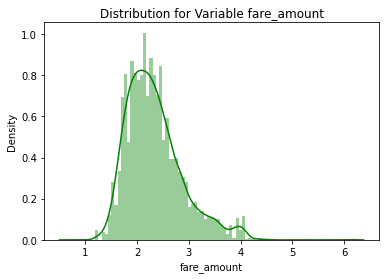

distance


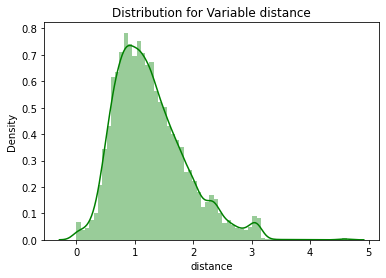

In [65]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

# Applying ML ALgorithms: 

In [66]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2015,1,27,1,13,0.708412
1,2.884801,1,2015,1,27,1,13,2.246029
2,1.902108,2,2011,10,8,5,11,0.871095
3,2.163323,1,2012,12,1,5,21,1.334809
4,1.840550,1,2012,12,1,5,21,1.098331


In [67]:
x =train.drop(['fare_amount'],axis=1)
y =train['fare_amount']

print(x)

print('--------------------------------------------------------------------')

print(y)




      passenger_count  year  Month  Date  Day  Hour  distance
0                   1  2015      1    27    1    13  0.708412
1                   1  2015      1    27    1    13  2.246029
2                   2  2011     10     8    5    11  0.871095
3                   1  2012     12     1    5    21  1.334809
4                   1  2012     12     1    5    21  1.098331
...               ...   ...    ...   ...  ...   ...       ...
9909                1  2015      5    10    6    12  1.167123
9910                5  2015      1    12    0    17  1.827801
9911                5  2015      4    19    6    20  0.630842
9912                1  2015      1    31    5     1  0.951919
9913                2  2015      1    18    6    14  0.925670

[9487 rows x 7 columns]
--------------------------------------------------------------------
0       1.704748
1       2.884801
2       1.902108
3       2.163323
4       1.840550
          ...   
9909    2.079442
9910    2.803360
9911    1.547563
9912    2

In [68]:
##train test split for further modelling
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=2)

In [69]:
print('Total = ',train.shape)
print('---------------------------------------------')
print('x_train =',x_train.shape)
print('---------------------------------------------')
print('x_test = ',x_test.shape)


Total =  (9487, 8)
---------------------------------------------
x_train = (7589, 7)
---------------------------------------------
x_test =  (1898, 7)


### Linear Regression Model :

In [70]:
# Building model on top of training dataset
fit_LR = LinearRegression()
fit_LR.fit(x_train , y_train)
#prediction on train data
pred_train_LR = fit_LR.predict(x_train)

#prediction on test data
pred_test_LR = fit_LR.predict(x_test)


#calculate R^2 for train data
from sklearn.metrics import r2_score

print("R2_Score for known data = ",r2_score(y_train, pred_train_LR))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test, pred_test_LR))



R2_Score for known data =  0.7330568595717948
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7183427577861121


### Decision tree Algorithm 

In [71]:
fit_DT = DecisionTreeRegressor()
fit_DT.fit(x_train,y_train)
#prediction on train data
pred_train_DT = fit_DT.predict(x_train)

#prediction on test data
pred_test_DT = fit_DT.predict(x_test)

# R^2 calculation for train data
print("R2_Score for known data = ",r2_score(y_train,pred_train_DT))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data= ",r2_score(y_test,pred_test_DT))


R2_Score for known data =  1.0
------------------------------------------------------------------------------------
R2_Score for unknown data=  0.4542090709023211


### Random Forest Algorithm

In [72]:
fit_RF = RandomForestRegressor()
fit_RF.fit(x_train,y_train)
#prediction on train data
pred_train_RF = fit_RF.predict(x_train)

#prediction on test data
pred_test_RF = fit_RF.predict(x_test)





## calculate R^2 for train data
print("R2_Score for known data = ",r2_score(y_train,pred_train_RF))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test,pred_test_RF))




R2_Score for known data =  0.9636168677212233
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7016392287677895


### Gradient Boosting Algorithm

In [73]:
fit_GB = GradientBoostingRegressor()
fit_GB.fit(x_train, y_train)
#prediction on train data
pred_train_GB = fit_RF.predict(x_train)

#prediction on test data
pred_test_GB = fit_RF.predict(x_test)





#calculate R^2 for train data
print("R2_Score for known data = ",r2_score(y_train,pred_train_GB))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test,pred_test_GB))

R2_Score for known data =  0.9636168677212233
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7016392287677895


In [74]:
XGBR =  XGBRegressor()
XGBR.fit(x_train,y_train)
#prediction on train data
pred_train_XGB = XGBR.predict(x_train)

#prediction on test data
pred_test_XGB = XGBR.predict(x_test)

#calculate R^2 for train data
print("R2_Score for known data = ",r2_score(y_train,pred_train_XGB))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test,pred_test_XGB))

R2_Score for known data =  0.9091249416377623
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7164666342811963


In [75]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [76]:
print(elasticCV.alpha_)
print(elasticCV.l1_ratio)

0.0007512617659700885
0.5


In [77]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
#prediction on train data
pred_train_reg = elasticnet_reg.predict(x_train)

#prediction on test data
pred_test_reg = elasticnet_reg.predict(x_test)

#calculate R^2 for train data
print("R2_Score for known data = ",r2_score(y_train,pred_train_reg))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test,pred_test_reg))

R2_Score for known data =  0.7330522737786777
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7183653094568577


Here we see the Linear Regression Model perform well with this data. 
and the Linear Regression Model give me robust  accurasy
We can also see train accuracy and test accuracy Linear Regression Model 
perform both are % near to same thats why we are going to select this model 
and hyper tune it model

## Optimizing the results with parameters tuning

In [78]:
LR = LinearRegression()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(LR.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [79]:
parameters = {"fit_intercept": [True,False],
              "normalize": [True, False],
              "copy_X": [True, False], 
             }
grid = GridSearchCV(estimator=LR, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(x_train, y_train)
              

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [80]:
'''ramdom_search =RandomizedSearchCV(estimator = gb,
param_distributions =random_grid,
n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)'''

'ramdom_search =RandomizedSearchCV(estimator = gb,\nparam_distributions =random_grid,\nn_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)'

In [81]:
'''gb.get_params().keys()'''

'gb.get_params().keys()'

In [82]:
'''ramdom_search.fit(x_train,y_train)'''

'ramdom_search.fit(x_train,y_train)'

In [83]:
best_parameters = grid.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [84]:
# Building model on top of training dataset
final_LR = LinearRegression(copy_X=True,fit_intercept=False,normalize = True)
final_LR.fit(x_train , y_train)
#prediction on train data
pred_train_FLR = final_LR.predict(x_train)

#prediction on test data
pred_test_FLR = final_LR.predict(x_test)


#calculate R^2 for train data
from sklearn.metrics import r2_score

print("R2_Score for known data = ",r2_score(y_train, pred_train_FLR))
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_score(y_test, pred_test_FLR))


R2_Score for known data =  0.7330486895485872
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7182705427870038


In [85]:
# saving the model to the local file system
filename = 'LR_model.pickle'
pickle.dump(final_LR , open(filename, 'wb'))

In [86]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[1,2015,1,27,1,13,0.708412]])
a

array([1.90538269])

Lets predict fare amount for our test data set 

1)we need to perform step same we was did in train data set

In [87]:
#checking the data-types in test dataset
test.dtypes 

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [88]:
#Convert fare_amount from object to numeric
# train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [89]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [90]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [91]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
#Here for haversine formula help taken from formula.in
from math import radians, cos, sin, asin, sqrt
#we define function for haversine
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [92]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [94]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop, axis = 1)

In [95]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['year'] = test['year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [96]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [97]:
test.head(10)

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301
5,1,2012,12,1,5,21,3.222549
6,1,2011,10,6,3,12,0.929601
7,1,2011,10,6,3,12,21.540102
8,1,2011,10,6,3,12,3.873962
9,1,2014,2,18,1,15,1.099794


In [101]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
b=loaded_model.predict(test)
b = pd.DataFrame(b)

In [103]:
test['predict_fare'] = b

In [104]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,predict_fare
0,1,2015,1,27,1,13,2.323259,3.144969
1,1,2015,1,27,1,13,2.425353,3.223338
2,1,2011,10,8,5,11,0.618628,1.839171
3,1,2012,12,1,5,21,1.961033,2.875788
4,1,2012,12,1,5,21,5.387301,5.505855
